## Observations and Insights 

Conclusion pharmaceutical 
1.	Based on the below pie chart we can see that there is almost equal distribution male and female in the study data frame.
2.	Based on below box plot we can see that mouse treated with capomulin have least spread of  tumor volume(lowest IQR).
3.	Correlation between mouse weight and tumor volume 0.84 which means higher the mouse weight most likely higher the tumor volume. We can also see that from the below regression line.  
4.  There is aleast one outlier for Infubinol'

In [1]:
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#display(mouse_metadata.head())
#display(study_results.head())

# Combine the data into a single datasetf
mouse_study_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
mouse_study_df_arr = mouse_study_df['Mouse ID'].unique()
print(str(mouse_study_df_arr.size) + " number of unique mice IDs in the data")


249 number of unique mice IDs in the data


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ID_timepoint_duplicate = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
mouse_ID_timepoint_duplicate

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_ID_timepoint_duplicate_all_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(mouse_ID_timepoint_duplicate["Mouse ID"])]
mouse_ID_timepoint_duplicate_all_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_filter_df = mouse_study_df[~mouse_study_df["Mouse ID"].isin(mouse_ID_timepoint_duplicate["Mouse ID"])]
mouse_study_filter_df.shape

(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_filter_list = mouse_study_filter_df['Mouse ID'].unique()
print(str(mouse_study_filter_list.size) + " number of unique mice IDs in clean data")

248 number of unique mice IDs in clean data


## Summary Statistics

In [7]:
mouse_study_filter_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor_mean  = mouse_study_filter_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby(["Drug Regimen"]).mean().reset_index().\
                    rename(columns={'Tumor Volume (mm3)':'Mean Tumor'})
Tumor_median  = mouse_study_filter_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby(["Drug Regimen"]).median().reset_index().\
                    rename(columns={'Tumor Volume (mm3)':'Median Tumor'})
Tumor_var  = mouse_study_filter_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby(["Drug Regimen"]).var().reset_index().\
                    rename(columns={'Tumor Volume (mm3)':'var Tumor'})
Tumor_std  = mouse_study_filter_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby(["Drug Regimen"]).std().reset_index().\
                    rename(columns={'Tumor Volume (mm3)':'std Tumor'})
Tumor_sem  = mouse_study_filter_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby(["Drug Regimen"]).sem().reset_index().\
                    rename(columns={'Tumor Volume (mm3)':'sem Tumor'})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Tumor_df_1 = pd.merge(Tumor_mean,Tumor_median,how="inner",on="Drug Regimen")
Tumor_df_2 = pd.merge(Tumor_df_1,Tumor_var,how="inner",on="Drug Regimen")
Tumor_df_3 =  pd.merge(Tumor_df_2,Tumor_std,how="inner",on="Drug Regimen")
Tumor_df_4 =  pd.merge(Tumor_df_3,Tumor_sem,how="inner",on="Drug Regimen")
Tumor_df_4 = Tumor_df_4.set_index('Drug Regimen')
#Tumor_df_4.index.names = [None]
#display(Tumor_mean)
#display(Tumor_median)
#display(Tumor_var)
#display(Tumor_std)
#display(Tumor_sem)
display(Tumor_df_4 )

Mean Tumor  Median Tumor  var Tumor  std Tumor  sem Tumor
Drug Regimen                                                           
Capomulin      40.675741     41.557809  24.947764   4.994774   0.329346
Ceftamin       52.591172     51.776157  39.290177   6.268188   0.469821
Infubinol      52.884795     51.820584  43.128684   6.567243   0.492236
Ketapril       55.235638     53.698743  68.553577   8.279709   0.603860
Naftisol       54.331565     52.509285  66.173479   8.134708   0.596466
Placebo        54.033581     52.288934  61.168083   7.821003   0.581331
Propriva       52.320930     50.446266  43.852013   6.622085   0.544332
Ramicane       40.216745     40.673236  23.486704   4.846308   0.320955
Stelasyn       54.233149     52.431737  59.450562   7.710419   0.573111
Zoniferol      53.236507     51.818479  48.533355   6.966589   0.516398

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = mouse_study_filter_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_statistics_agg

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

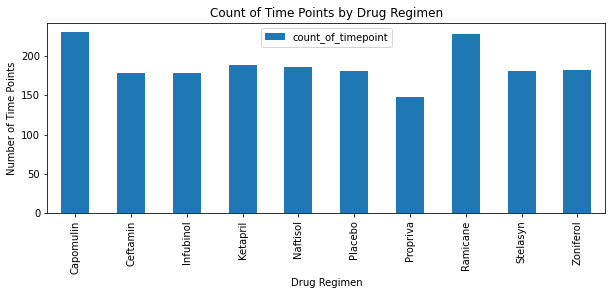

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

data_bar_chart = mouse_study_filter_df[["Timepoint","Drug Regimen"]].groupby('Drug Regimen').count().rename(columns={'Timepoint':'count_of_timepoint'})
# Use DataFrame.plot() in order to create a bar chart of the data
data_bar_chart.plot(kind="bar", figsize=(10,3.5))

# Set a title for the chart
plt.title("Count of Time Points by Drug Regimen")
plt.ylabel("Number of Time Points")
plt.show()
plt.tight_layout()

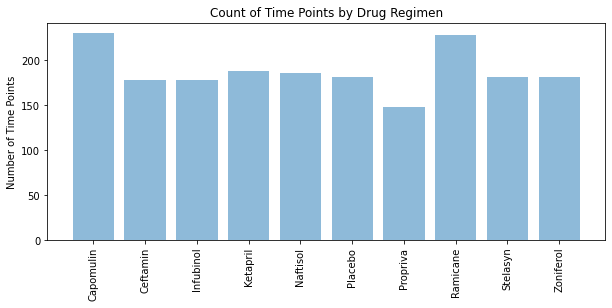

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x axis and tick locations
data_bar_chart_2 = data_bar_chart.reset_index()
x_axis = np.arange(len(data_bar_chart_2))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,4))
plt.bar(x_axis, data_bar_chart_2["count_of_timepoint"], alpha=0.5, align="center")
plt.xticks(tick_locations, data_bar_chart_2['Drug Regimen'], rotation="vertical")
plt.title("Count of Time Points by Drug Regimen")
plt.ylabel("Number of Time Points")
plt.show()
plt.tight_layout()

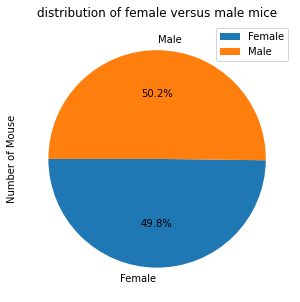

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_pie_chart = mouse_metadata[["Mouse ID","Sex"]].groupby('Sex').count().rename(columns={'Mouse ID':'Number of Mouse'})
data_pie_chart
data_pie_chart.plot(kind="pie",subplots=True,figsize=(5, 5), autopct="%1.1f%%",startangle=180)

# Set a title for the chart
plt.title("distribution of female versus male mice")

plt.show()


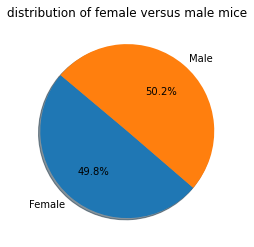

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data_pie_chart_2 = data_pie_chart.reset_index()
plt.pie(data_pie_chart_2["Number of Mouse"], labels=data_pie_chart_2["Sex"], 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("distribution of female versus male mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
mouse_study_filter_df = mouse_study_filter_df.sort_values(by=['Mouse ID','Timepoint'], ascending =True,axis=0)
mouse_study_filter_last_timepoint_df = mouse_study_filter_df.sort_values(by=['Mouse ID','Timepoint']).groupby('Mouse ID').tail(1)
mouse_study_filter_last_timepoint_df=mouse_study_filter_last_timepoint_df.reset_index()
mouse_study_filter_last_timepoint_df=mouse_study_filter_last_timepoint_df.drop(columns=['index'])
display(mouse_study_filter_last_timepoint_df.head())
# Capomulin, Ramicane, Infubinol, and Ceftamin
filter_Capomulin_df= mouse_study_filter_last_timepoint_df[mouse_study_filter_last_timepoint_df["Drug Regimen"].isin(["Capomulin"])]
filter_Ramicane_df= mouse_study_filter_last_timepoint_df[mouse_study_filter_last_timepoint_df["Drug Regimen"].isin(["Ramicane" ])]
filter_Infubinol_df= mouse_study_filter_last_timepoint_df[mouse_study_filter_last_timepoint_df["Drug Regimen"].isin(["Infubinol"])]
filter_Ceftamin_df= mouse_study_filter_last_timepoint_df[mouse_study_filter_last_timepoint_df["Drug Regimen"].isin(["Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     a203    Infubinol  Female          20          23         45   
1     a251    Infubinol  Female          21          25         45   
2     a262      Placebo  Female          17          29         45   
3     a275     Ceftamin  Female          20          28         45   
4     a366     Stelasyn  Female          16          29         30   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
#creating a list for treatment name
treatment_name = ["Capomulin","Ramicane","Infubinol","Ceftamin" ]
#creating an empty list
tumor_volume = []

# for loop for geting the tumor volume
for treatment in treatment_name:
    regimen = mouse_study_filter_last_timepoint_df.loc[mouse_study_filter_last_timepoint_df["Drug Regimen"] == treatment]
    tumor_vol= regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_volume.append(tumor_vol)
    quartile = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    IQR = upperq-lowerq
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    print(f"For {treatment} IQR is {IQR}; values below {lower_bound} and above {upper_bound} could be outliers")
    

For Capomulin IQR is 7.781863460000004; values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane IQR is 9.098536719999998; values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol IQR is 11.477135160000003; values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin IQR is 15.577752179999997; values below 25.355449580000002 and above 87.66645829999999 could be outliers


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#manualiy testing the IQR and outliers
#capomulin_tumors = filter_Capomulin_df["Tumor Volume (mm3)"]
#capomulin_quartiles = capomulin_tumors.quantile([.25,.5,.75])
#capomulin_lowerq = capomulin_quartiles[0.25]
#capomulin_upperq = capomulin_quartiles[0.75]
#capomulin_iqr = capomulin_upperq-capomulin_lowerq
#capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
#capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
#print(f"Capomulin pontential outliers values less than {capomulin_lower_bound} or greater {capomulin_upper_bound} ")

#ramicane_tumors = filter_Ramicane_df["Tumor Volume (mm3)"]
#ramicane_quartiles = ramicane_tumors.quantile([.25,.5,.75])
#ramicane_lowerq = ramicane_quartiles[0.25]
#ramicane_upperq = ramicane_quartiles[0.75]
#ramicane_iqr = ramicane_upperq-ramicane_lowerq
#ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
#ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
#print(f"ramicane outliers values less than {ramicane_lower_bound} or greater {ramicane_upper_bound} ")

#infubinol_tumors = filter_Infubinol_df["Tumor Volume (mm3)"]
#infubinol_quartiles = infubinol_tumors.quantile([.25,.5,.75])
#infubinol_lowerq = infubinol_quartiles[0.25]
#infubinol_upperq = infubinol_quartiles[0.75]
#infubinol_iqr = infubinol_upperq-infubinol_lowerq
#infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
#infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
#print(f"infubinol outliers values less than {infubinol_lower_bound} or greater {infubinol_upper_bound} ")

#ceftamin_tumors = filter_Ceftamin_df["Tumor Volume (mm3)"]
#ceftamin_quartiles = ceftamin_tumors.quantile([.25,.5,.75])
#ceftamin_lowerq = ceftamin_quartiles[0.25]
#ceftamin_upperq = ceftamin_quartiles[0.75]
#ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
#ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
#ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
#print(f"ceftamin outliers values less than {ceftamin_lower_bound} or greater {ceftamin_upper_bound} ")    

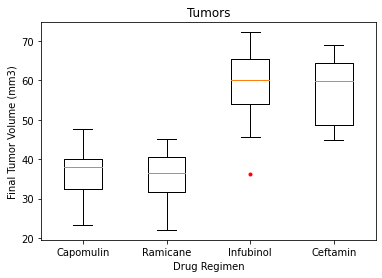

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumor_volume[0],tumor_volume[1],tumor_volume[2],tumor_volume[3]]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
#outliers in red colour
ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],sym='r.')

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_line_plot_df = mouse_study_filter_df.loc[ mouse_study_filter_df["Mouse ID"] == "b128",:]
capomulin_line_plot_df.head(10)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
300     b128    Capomulin  Female           9          22          0   
301     b128    Capomulin  Female           9          22          5   
302     b128    Capomulin  Female           9          22         10   
303     b128    Capomulin  Female           9          22         15   
304     b128    Capomulin  Female           9          22         20   
305     b128    Capomulin  Female           9          22         25   
306     b128    Capomulin  Female           9          22         30   
307     b128    Capomulin  Female           9          22         35   
308     b128    Capomulin  Female           9          22         40   
309     b128    Capomulin  Female           9          22         45   

     Tumor Volume (mm3)  Metastatic Sites  
300           45.000000                 0  
301           45.651331                 0  
302           43.270852                 0  
303           43.784893                 0  
304           42.731552                 0  
305           43.262145                 1  
306           40.605335                 1  
307           37.967644                 1  
308           38.379726                 2  
309           38.982878                 2

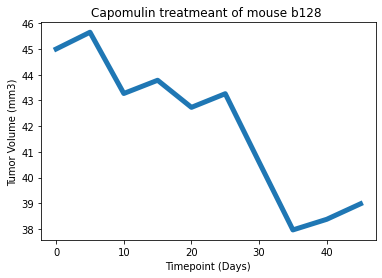

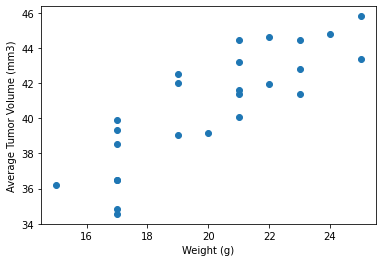

In [19]:
#genrating a line plot that shows the tumor volume vs. time point for one mouse treated with Capomulin
x_axis = capomulin_line_plot_df["Timepoint"]
tumor_volume = capomulin_line_plot_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b128 ')
plt.plot(x_axis, tumor_volume,linewidth=5, markersize=20)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
# scatter plot that shows average tumor volume vs. mouse weight for the Capomulin regimen.
Capomulin_df = mouse_study_filter_df[mouse_study_filter_df["Drug Regimen"].isin(["Capomulin"])]
volume_mean_df = Capomulin_df[['Mouse ID','Tumor Volume (mm3)','Weight (g)']].groupby(['Mouse ID']).mean()
plt.scatter(volume_mean_df['Weight (g)'],volume_mean_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
corr_df = round(st.pearsonr(volume_mean_df ['Weight (g)'],volume_mean_df ['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr_df}")
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between mouse weight and average tumor volume is 0.84


In [21]:
#getting variable for linear regression model 
liner_reg_model = st.linregress(volume_mean_df['Weight (g)'],volume_mean_df['Tumor Volume (mm3)'])
liner_reg_model


LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694722, pvalue=1.3225722434712285e-07, stderr=0.1275435903320132, intercept_stderr=2.590987686768345)

In [22]:
mslope = 0.9544396890241045
intercept = 21.552160532685015

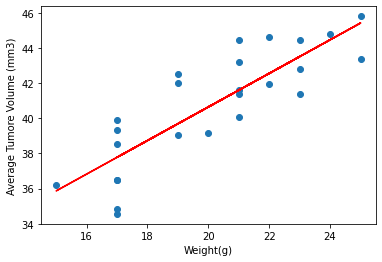

In [23]:
#genrating the regression line for ploting
y_values = volume_mean_df['Weight (g)']*mslope+intercept
plt.scatter(volume_mean_df['Weight (g)'],volume_mean_df['Tumor Volume (mm3)'])
plt.plot(volume_mean_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()